# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Fabiansyah Rinanto Suryadi]
- **Email:** [fabiansyah19@gmail.com]
- **ID Dicoding:** [fabiann]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Hubungan musim dengan penyewa sepeda secara keseluruhan setiap jam. Apakah musim dapat mempengaruhi bisnis sewa sepeda?
- Pertanyaan 2: Hubungan *temperature* dengan penyewa sepeda secara keseluruhan setiap jam. Apakah suhu udara pada jam tersebut dapat mempengaruhi bisnis sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

meng-*import* semua library yang digunakan.

## Data Wrangling

### Gathering Data

In [14]:
biker_hour = pd.read_csv("hour.csv")

biker_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Membaca data dari "hour.csv" dan menampilkan 5 baris pertama dengan "head".

### Assessing Data

In [15]:
biker_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mendapatkan informasi tentang data tersebut: Jumlah nilai non-null dalam setiap kolom, tipe data dari setiap kolom, dan penggunaan memori dari data tersebut.

In [16]:
biker_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Script ini memberikan jumlah nilai yang hilang atau tidak ada dalam setiap kolom dari biker_hour.

In [20]:
biker_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

Menghitung jumlah nilai unik dalam setiap kolom.

In [18]:
print("Jumlah duplikasi: ", biker_hour.duplicated().sum())

Jumlah duplikasi:  0


Menghitung jumlah baris yang terduplikat dalam data tersebut.

In [51]:
biker_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menampilkan ringkasan statistik deskriptif.

### Cleaning Data

In [52]:
biker_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [53]:
biker_hour['temp'] *= 41

In [54]:
biker_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menormalisasikan nilai temperatur dengan mengkalikan nilai temp dengan 41. (Sesuai dari informasi file READMY.txt)

In [58]:
biker_hour['season'] = biker_hour['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [60]:
biker_hour ['season'] = biker_hour.season.astype('category')

In [61]:
biker_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,9.84,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,9.02,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,9.02,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,9.84,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,9.84,0.2879,0.75,0.0,0,1,1


Memberikan keterangan musim dengan nama musim dengan merubahnya dari angka. Mengubah tipe data menjadi "category".

In [62]:
biker_hour.rename(columns={'season' : 'Season', 'temp' : 'Temperature', 'cnt' : 'Total Renter'}, inplace=True)

biker_hour.head()

,instant,dteday,Season,yr,mnth,hr,holiday,weekday,workingday,weathersit,Temperature,atemp,hum,windspeed,casual,registered,Total Renter
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,9.84,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,9.02,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,9.02,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,9.84,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,9.84,0.2879,0.75,0.0,0,1,1


Merubah judul kolom pada tabel.

In [63]:
biker_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   instant       17379 non-null  int64   
 1   dteday        17379 non-null  object  
 2   Season        17379 non-null  category
 3   yr            17379 non-null  int64   
 4   mnth          17379 non-null  int64   
 5   hr            17379 non-null  int64   
 6   holiday       17379 non-null  int64   
 7   weekday       17379 non-null  int64   
 8   workingday    17379 non-null  int64   
 9   weathersit    17379 non-null  int64   
 10  Temperature   17379 non-null  float64 
 11  atemp         17379 non-null  float64 
 12  hum           17379 non-null  float64 
 13  windspeed     17379 non-null  float64 
 14  casual        17379 non-null  int64   
 15  registered    17379 non-null  int64   
 16  Total Renter  17379 non-null  int64   
dtypes: category(1), float64(4), int64(11), object(1)
m

In [66]:
biker_hour['Temperature'] = biker_hour['Temperature'].round()

In [67]:
biker_hour.head()

,instant,dteday,Season,yr,mnth,hr,holiday,weekday,workingday,weathersit,Temperature,atemp,hum,windspeed,casual,registered,Total Renter
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,10.0,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,9.0,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,9.0,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,10.0,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,10.0,0.2879,0.75,0.0,0,1,1


Membulatkan nilai temperature.

## Exploratory Data Analysis (EDA)

### Explore biker_hour

In [64]:
biker_hour.groupby(by='Season').agg({'Total Renter': ['max', 'min', 'mean', 'sum']})

Total Renter                         
                max min        mean      sum
Season                                      
Fall            977   1  236.016237  1061129
Spring          801   1  111.114569   471348
Summer          957   1  208.344069   918589
Winter          967   1  198.868856   841613

In [68]:
biker_hour.groupby(by='Temperature').agg({'Total Renter': ['max', 'min', 'mean', 'sum']})

Total Renter                         
                     max  min        mean     sum
Temperature                                      
1.0                  315    1   41.882353     712
2.0                  180    1   38.812500    1242
3.0                   84    1   28.235294     480
4.0                  417    1   49.294118    2514
5.0                  423    1   58.421053    4440
6.0                  245    1   55.108696    7605
7.0                  501    1   63.379221   24401
8.0                  679    1   79.745763   28230
9.0                  729    1   69.914489   29434
10.0                 692    1   80.159004   41843
11.0                 691    1   94.537209   81302
12.0                 668    1  115.917317   74303
13.0                 711    1  134.230769   82015
14.0                 724    1  135.308527   87274
15.0                 731    1  147.842027   99202
16.0                 817    1  166.223124  163896
17.0                 745    1  175.341241   96087
18.0                 835    1  158.907298   80566
19.0                 837    1  162.906977   91065
20.0                 839    1  195.617827  160211
21.0                 943    1  202.967626  112850
22.0                 888    1  200.284710  113962
23.0                 856    1  213.740933  123756
24.0                 948    1  222.065574   67730
25.0                 968    1  212.769450  298090
26.0                 976    1  223.966763  154985
27.0                 977    1  225.402597  156204
28.0                 938    3  209.538682   73129
29.0                 970    2  256.953623  177298
30.0                 957    2  299.296501  325036
31.0                 891    4  342.575758  135660
32.0                 872    6  313.195266   52930
33.0                 913   22  347.375385  112897
34.0                 897   48  334.236467  117317
35.0                 810   94  322.954198   42307
36.0                 705  102  363.660377   19274
37.0                 772  106  309.288889   27836
38.0                 770  118  320.020408   15681
39.0                 464  101  244.909091    8082
40.0                 539  539  539.000000     539
41.0                 294  294  294.000000     294

In [ ]:
Mengelompokkan Total Renter terhadap Season dan Temperature.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Hubungan musim dengan penyewa sepeda secara keseluruhan setiap jam. Apakah musim dapat mempengaruhi bisnis sewa sepeda?

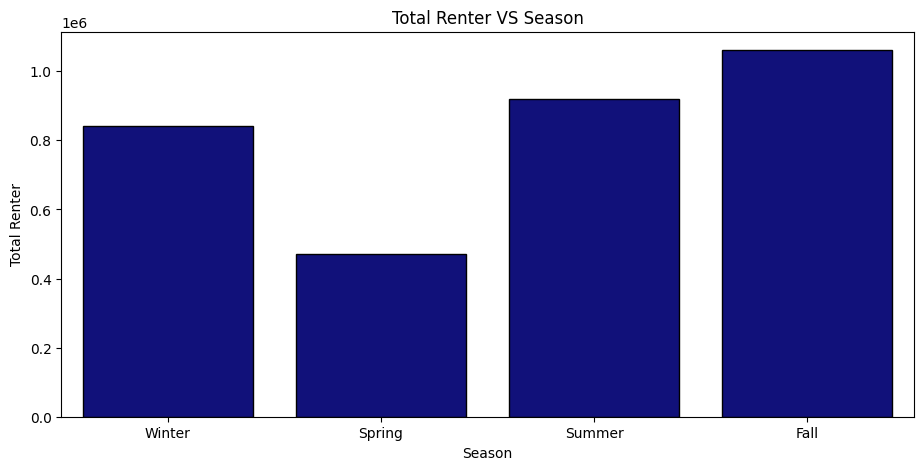

In [110]:
plt.figure(figsize=(11, 5))
seasons = biker_hour.groupby('Season')[['Total Renter']].sum().reset_index()

season_order = ['Winter', 'Spring', 'Summer', 'Fall']

sns.barplot(x='Season', y='Total Renter', data=seasons, order=season_order, color='#00008B', edgecolor='#000000')

plt.title("Total Renter VS Season")
plt.xlabel("Season")
plt.ylabel("Total Renter")
plt.show()

Membuat bar plot.

### Pertanyaan 2: Hubungan temperature dengan penyewa sepeda secara keseluruhan setiap jam. Apakah suhu udara pada jam tersebut dapat mempengaruhi bisnis sewa sepeda?

<Figure size 1100x500 with 0 Axes>

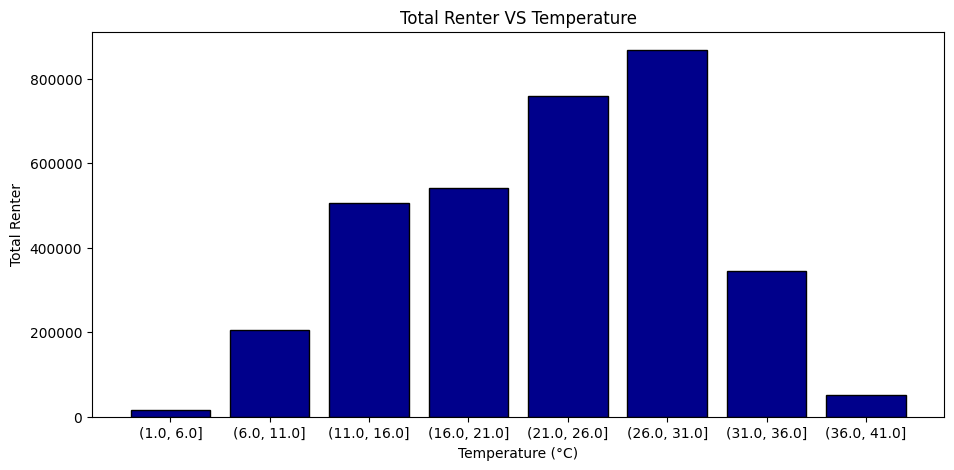

In [108]:
plt.figure(figsize=(11, 5))

bins = np.arange(biker_hour['Temperature'].min(), biker_hour['Temperature'].max() + 1, 5)

biker_hour['Temperature_bin'] = pd.cut(biker_hour['Temperature'], bins=bins)
renter_by_temp = biker_hour.groupby('Temperature_bin')['Total Renter'].sum()

plt.figure(figsize=(11, 5))
plt.bar(renter_by_temp.index.astype(str), renter_by_temp, color='#00008B', edgecolor='#000000')

plt.xlabel('Temperature (°C)')
plt.ylabel('Total Renter')
plt.title('Total Renter VS Temperature')

plt.show()

Membuat bar plot.

## Conclusion

**Conclution pertanyaan 1**

Musim gugur menunjukkan jumlah penyewa sepeda yang paling tinggi, diikuti oleh musim panas, musim dingin, dan musim semi. Hal tersebut menunjukkan bahwa musim dapat mempengaruhi bisnis sewa sepeda, dengan musim gugur menjadi periode paling menguntungkan untuk bisnis tersebut.


**Conclution pertanyaan 2**

Rentang suhu udara antara 26 hingga 31 derajat Celsius menunjukkan jumlah penyewa sepeda paling tinggi. Jumlah penyewa sepeda juga cenderung menurun seiring dengan peningkatan atau penurunan suhu udara dari rentang tersebut. Hal ini menunjukkan adanya hubungan non-linear antara suhu udara dan jumlah penyewa sepeda, dengan suhu tertentu yang menjadi puncak popularitas dalam persewaan sepeda.